# Proyecto 3
## Ataques a Modelos de Deep Learning
Ataque y defensa de modelos de aprendizaje de máquina y aprendizaje profundo.
> #### Gerardo Méndez 18239
> #### María José Castro 181202

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from keras.constraints import maxnorm
from keras.preprocessing.image import ImageDataGenerator

In [2]:
DATA_DIRECTORY = 'data/images'

### OBTENCION DE IMAGENES

In [3]:
path_images = ImageDataGenerator().flow_from_directory(directory=DATA_DIRECTORY, target_size=(128,128), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [4]:
images, marks = next(path_images)

In [5]:
indices_path = path_images.class_indices

In [6]:
type_images = indices_path.keys()

In [7]:
shape = marks.shape

print("--> NO. DE IMÁGENES: ", shape[0])
print("--> NO. DE CLASES: ", shape[1])

--> NO. DE IMÁGENES:  9339
--> NO. DE CLASES:  25


In [8]:
add = sum(marks)
marks_qt = marks.shape[0]

In [9]:
quantity = ((add) / marks_qt)

In [10]:
quantity = quantity * 100
quantity

array([ 1.3063496 ,  1.2421031 , 31.577257  , 17.036085  ,  2.1201413 ,
        1.1350251 ,  1.5633365 ,  2.141557  ,  1.895278  ,  1.7346611 ,
        4.079666  ,  4.615055  ,  2.2807581 ,  1.9702322 ,  1.3170575 ,
        1.7025378 ,  1.4562588 ,  1.5205053 ,  1.6918299 ,  0.85662276,
        1.3705964 ,  1.4134276 ,  4.3687763 ,  1.038655  ,  8.566228  ],
      dtype=float32)

### DIVISION DE DATOS

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(images/255.,marks, test_size=0.3)

In [17]:
#Datasets de train de X
print(X_train.shape)
print(X_train.size)

(6537, 128, 128, 3)
321306624


In [18]:
#Dataset de test de X
print(X_test.shape)
print(X_test.size)

(2802, 128, 128, 3)
137723904


In [19]:
#Dataset de train de Y
print(y_train.shape)
print(y_train.size)

(6537, 25)
163425


In [20]:
#Dataset de test de Y
print(y_test.shape)
print(y_test.size)

(2802, 25)
70050


### MODELO

In [21]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), input_shape=(128, 128, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(25, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 460800)            0

In [23]:
model.layers

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
op = model.evaluate(X_test, y_test)
print("Accuracy ", op[1])

88/88 [==============================] - 52s 262ms/step - loss: 3.2227 - accuracy: 0.0364
Accuracy  0.036402568221092224


In [26]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4)

Epoch 1/4
205/205 [==============================] - 357s 2s/step - loss: 4.3773 - accuracy: 0.3082 - val_loss: 2.9147 - val_accuracy: 0.3158
Epoch 2/4
205/205 [==============================] - 331s 2s/step - loss: 2.3972 - accuracy: 0.3889 - val_loss: 1.7266 - val_accuracy: 0.6970
Epoch 3/4
205/205 [==============================] - 332s 2s/step - loss: 0.5101 - accuracy: 0.8568 - val_loss: 0.4408 - val_accuracy: 0.9272
Epoch 4/4
205/205 [==============================] - 330s 2s/step - loss: 0.1585 - accuracy: 0.9575 - val_loss: 0.1983 - val_accuracy: 0.9425


In [27]:
type_images

dict_keys(['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A'])

In [28]:
model.save('model.h5')

### Ataque de Extraccion

Extra

In [46]:
y_pred=model.predict(X_test)

In [47]:
test_predict = np.argmax(model.predict(X_test), axis=-1)

In [48]:
target_test = np.argmax(y_test, axis=-1)

In [50]:
from sklearn.metrics import confusion_matrix

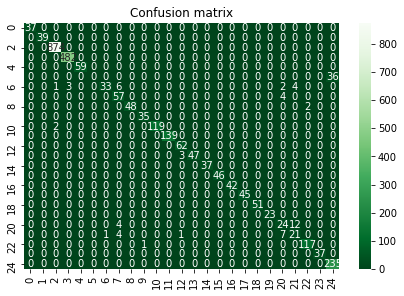

In [51]:
cm = confusion_matrix(target_test, test_predict)
get_cf(cm)

In [63]:
from sklearn.metrics import accuracy_score, classification_report

In [64]:
print(classification_report(test_predict, target_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00       877
           3       1.00      0.99      1.00       485
           4       1.00      1.00      1.00        59
           5       0.00      0.00      0.00         0
           6       0.67      0.97      0.80        34
           7       0.93      0.80      0.86        71
           8       0.96      1.00      0.98        48
           9       1.00      0.97      0.99        36
          10       0.98      1.00      0.99       119
          11       1.00      1.00      1.00       139
          12       1.00      0.94      0.97        66
          13       0.94      1.00      0.97        47
          14       1.00      1.00      1.00        37
          15       1.00      1.00      1.00        46
          16       1.00      1.00      1.00        42
          17       1.00    

c:\users\majo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\majo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\majo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu